# Вариант 9, Ягилев

In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
# min = (1, pi/4)

GAMMA = 10

def F1(x, y):
    return y - np.arctan(x)

def F2(x, y):
    return x - 1

def f1(x, y):
    return (GAMMA ** 2) * (F1(x, y) ** 2) + (F2(x, y) ** 2)

def f2(x, y):
    return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))


def f3(x, y):
    return (GAMMA ** 2) * abs(F1(x, y)) + abs(F2(x, y))

In [134]:
# Численное нахождение градиента и гессиана
def get_grad(func, x, y, h):
    f = func(x, y)
    g1 = (func(x+h, y) - f) / h
    g2 = (func(x, y+h) - f) / h
    return g1, g2

def get_hes(func, x, y, h):
    f = func(x, y)
    f01 = func(x+2*h, y)
    f02 = func(x+h, y+h)
    f03 = func(x, y+2*h)
    f04 = func(x+h, y)
    f05 = func(x, y+h)
    hes1 = (f01 - 2 * f04 + f) / h**2
    hes2 = (f02 - f04 - f05 + f) / h**2
    hes3 = (f03 - 2 * f05 + f) / h**2
    return hes1, hes2, hes3

### Построение сеточного графика и линий уровня функции двух переменных

In [135]:
def makeData(f_xy):
    # Строим сетку в интервале от -3.5 до 3.5, имеющую 100 отсчетов по обоим координатам
    x = np.linspace(-3.5, 3.5, 200)
    y = np.linspace(-3.5, 3.5, 200)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = np.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = f_xy(xgrid, ygrid)

    return xgrid, ygrid, z

def get_graph(f_xy, elev=None, azim=None, roll=None, slice=100):
    x, y, z = makeData(f_xy)

    # Сеточный график
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.view_init(elev=elev, azim=azim, roll=roll)
    axes.set_xlabel('$X$')
    axes.set_ylabel('$Y$')
    axes.set_zlabel('$Z$')
    axes.plot_surface(x, y, z, rstride=5, cstride=5, cmap='plasma')
    plt.show()
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(projection='3d')
    ax2.view_init(elev=elev, azim=azim, roll=roll)
    ax2.set_xlabel('$X$')
    ax2.set_ylabel('$Y$')
    ax2.set_zlabel('$Z$')
    z2 = (slice * x / x)
    z2 = [[z2[i][j] if z2[i][j] < z[i][j] else z[i][j] for j in range(len(z2[i]))] for i in range(len(z2))]
    z2 = np.array(z2, dtype=float)
    ax2.plot_surface(x, y, z2, rstride=5, cstride=5, cmap='plasma')
    plt.show()
    # Линии уровня
    cs = plt.contour(x, y, z, levels=10)
    plt.clabel(cs)
    plt.show()

# Построение графика траектории поиска
def graph_of_searchline(func, x_lst):
    x, y, z = makeData(func)
    cs = plt.contour(x, y, z, levels=10)
    plt.clabel(cs)

    xlist = [el[0] for el in x_lst]
    ylist = [el[1] for el in x_lst]
    plt.scatter(xlist, ylist, s=5)

#### Для первой фукнции

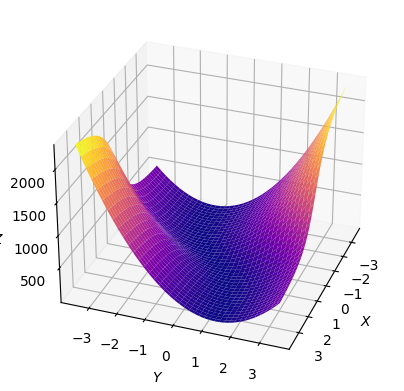

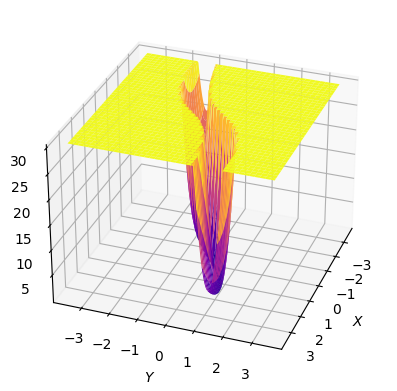

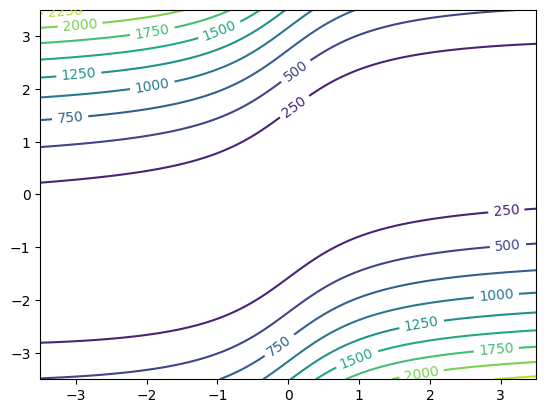

In [136]:
get_graph(f1, elev=None, azim=20, roll=None, slice=30)

#### Для второй фукнции

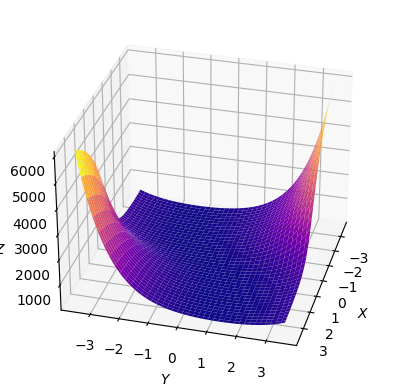

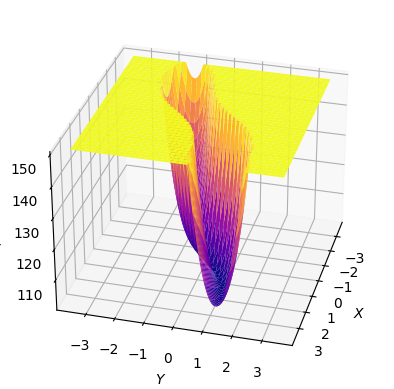

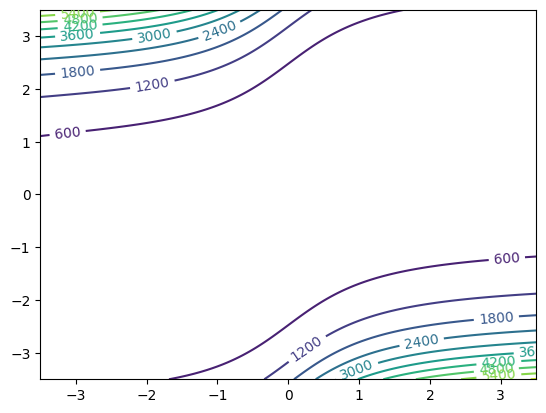

In [137]:
get_graph(f2, elev=None, azim=15, roll=None, slice=150)

#### Для третьей фукнции

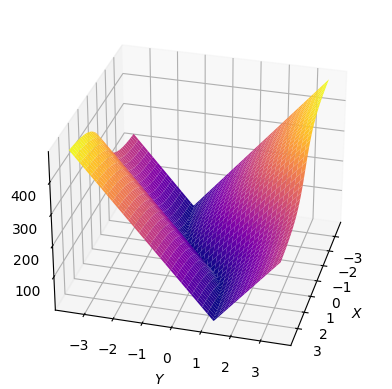

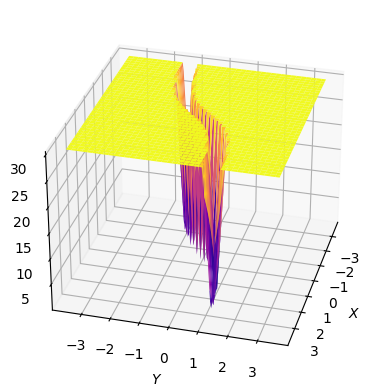

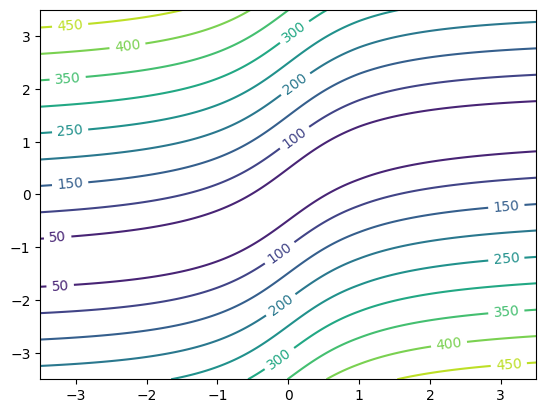

In [138]:
get_graph(f3, elev=None, azim=15, roll=None, slice=30)

## Методы второго порядка

### Метод Ньютона

In [139]:
def newton(func, xb, maxiter, eps):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb

    for j in range(maxiter):
        x_lst.append(xk)
        hes1, hes2, hes3 = get_hes(func, xk[0], xk[1], 0.00001)

        H = np.array([[hes1, hes2], [hes2, hes3]])
        eigenValues = np.linalg.eig(H)[0]

        minEig = min(eigenValues)

        if minEig < 0:
            exitflag = 2
            break

        g1, g2 = get_grad(func, xk[0], xk[1], 0.00001)

        g = np.array([g1, g2])

        Hinv = np.linalg.inv(H)
        p = - np.dot(Hinv, g)

        xk = xk + p

        ng = np.linalg.norm(g)

        if ng <= eps:
            exitflag = 1
            iters = j + 1
            x_lst.append(xk)
            break

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)
    
    msg = f"Начальная точка = {xb}\n"
    if exitflag != 2:
        msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
        if exitflag == 1:
            msg += f"Решение было найдено за количество итераций = {iters}\n"
        else:
            msg += f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    else:
        msg += f"Метод Ньютона из точки неприменим, последняя точка = {x_lst[-1]}\n"
    print(msg)

#### Результат работы метода для первой функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99961981 0.78520303], значение функции = 1.4704264663108345e-07
Решение было найдено за количество итераций = 6

Начальная точка = [-2, -2]
Метод Ньютона из точки неприменим, последняя точка = [ 0.8253324  -0.44648792]



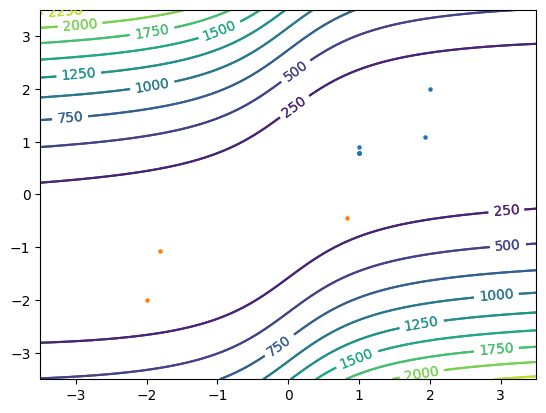

In [140]:
newton(f1, xb=[2, 2], maxiter=15000, eps=0.0001)
newton(f1, xb=[-2, -2], maxiter=15000, eps=0.0001)

#### Результат работы метода для второй функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99961981 0.78520303], значение функции = 101.00000007352145
Решение было найдено за количество итераций = 8

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99961981 0.78520303], значение функции = 101.00000007352193
Решение было найдено за количество итераций = 11



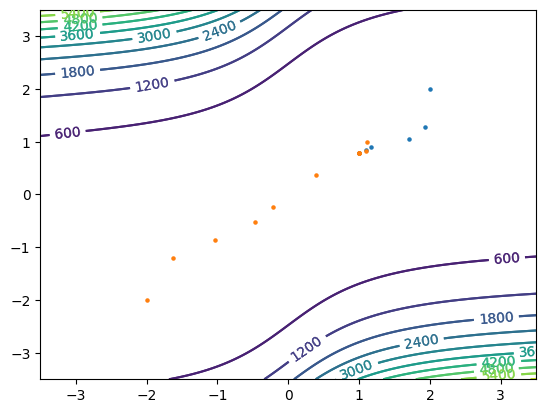

In [141]:
newton(f2, xb=[2, 2], maxiter=15000, eps=0.0001)
newton(f2, xb=[-2, -2], maxiter=15000, eps=0.0001)

### Метод Ньютона-Рафсона

In [142]:
def goldenratio(func, xb): # Метод золотого сечения
    x, y = xb[0], xb[1]
    eps = 0.01
    a = 0.8
    b = 0.9
    k1 = (3 - 5**0.5) / 2
    k2 = (5**0.5 - 1) / 2
    l1 = a + k1 * (b - a)
    l2 = a + k2 * (b - a)
    f1 = l1 * func(x, y)
    f2 = l2 * func(x, y)
    while (b - a) / 2 >= eps:
        if f1 < f2:
            b, l2, f2 = l2, l1, f1
            l1 = a + k1 * (b - a)
            f1 = l1 * func(x, y)
        else:
            a, l1, f1 = l1, l2, f2
            l2 = a + k2 * (b - a)
            f2 = l2 * func(x, y)
    return (a + b) / 2


def newtonRaphson(func, xb, maxiter, eps):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb

    alpha = goldenratio(func, xk)

    for j in range(maxiter):
        x_lst.append(xk)
        hes1, hes2, hes3 = get_hes(func, xk[0], xk[1], 0.00001)

        H = np.array([[hes1, hes2], [hes2, hes3]])
        eigenValues = np.linalg.eig(H)[0]

        minEig = min(eigenValues)

        if minEig < 0:
            exitflag = 2
            break

        g1, g2 = get_grad(func, xk[0], xk[1], 0.00001)

        g = np.array([g1, g2])

        Hinv = np.linalg.inv(H)
        p = - np.dot(Hinv, g)

        xk = xk + p * alpha

        ng = np.linalg.norm(g)

        if ng <= eps:
            exitflag = 1
            iters = j + 1
            x_lst.append(xk)
            break

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)
    
    msg = f"Начальная точка = {xb}\n"
    if exitflag != 2:
        msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
        if exitflag == 1:
            msg += f"Решение было найдено за количество итераций = {iters}\n"
        else:
            msg += f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    else:
        msg += f"Метод Ньютона из точки неприменим, последняя точка = {x_lst[-1]}\n"
    print(msg)

#### Результат работы метода для первой функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99962028 0.7852033 ], значение функции = 1.4665538704414253e-07
Решение было найдено за количество итераций = 13

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99962028 0.7852033 ], значение функции = 1.4665808051727025e-07
Решение было найдено за количество итераций = 18



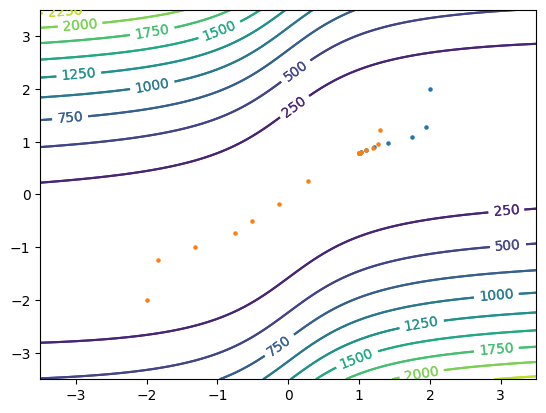

In [143]:
newtonRaphson(f1, xb=[2, 2], maxiter=3000, eps=0.0001)
newtonRaphson(f1, xb=[-2, -2], maxiter=3000, eps=0.0001)

#### Результат работы метода для второй функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99962078 0.78520358], значение функции = 101.00000007312428
Решение было найдено за количество итераций = 13

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99962238 0.78520448], значение функции = 101.00000007246638
Решение было найдено за количество итераций = 16



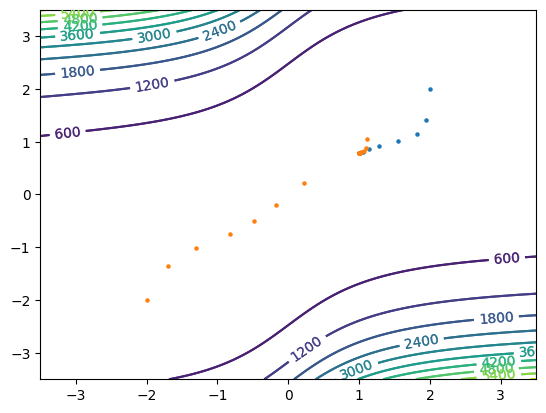

In [144]:
newtonRaphson(f2, xb=[2, 2], maxiter=3000, eps=0.0001)
newtonRaphson(f2, xb=[-2, -2], maxiter=3000, eps=0.0001)

##### *Вывод по методам Ньютона:*

Оба метода нашли минимум функций с заданной точностью за гораздо меньшее количество итерации в сравнении с методом наискорейшего спуска, реализованным в прошлой лабораторной работе. Но, стоит отметить, что метод Ньютона неприменим для первой функции из начальной точки = (-2, -2). Эту проблему решает метод Ньютона-Рафсона, корректирующий величину шага параметром альфа, найденным на каждой итерации методом золотого сечения. Количество итераций для метода Ньютона-Рафсона незначительно выше, чем для метода Ньютона, что компенсируется более свободным выбором начального приближения.

## Методы сопряжённых градиентов

### Метод Полака-Рибьера

In [145]:
def goldenRatio(f, xk, pk, tol=1e-6):
    """
    Метод золотого сечения для поиска минимума функции f(xk + alpha * pk) на отрезке [a, b].
    """
    # Константы золотого сечения
    phi = (1 + 5 ** 0.5) / 2
    resphi = 2 - phi

    # Начальные значения точек
    a = 0
    b = 1

    # Значения функции в точках a и b
    xkA = xk + a * pk
    xkB = xk + b * pk
    fa = f(xkA[0], xkA[1])
    fb = f(xkB[0], xkB[1])

    # Пока не достигнута требуемая точность
    while abs(b - a) > tol:
        # Сужаем интервал
        if fa < fb:
            b = a + resphi * (b - a)
            xkB = xk + b * pk
            fb = f(xkB[0], xkB[1])
        else:
            a = b - resphi * (b - a)
            xkA = xk + a * pk
            fa = f(xkA[0], xkA[1])

    # Возвращаем середину интервала
    return (a + b) / 2


def polakRibiere(func, xb, maxiter, eps):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb

    beta = 0
    g1, g2 = get_grad(func, xb[0], xb[1], 0.00001)
    gPrev = np.array([g1, g2])
    p = -gPrev

    for j in range(maxiter):
        x_lst.append(xk)

        alpha = goldenRatio(func, xk, p)

        xNext = xk + alpha * p

        g1, g2 = get_grad(func, xNext[0], xNext[1], 0.00001)
        gNext = np.array([g1, g2])

        if j % 5 == 0:
            beta = 0
        else:
            beta = np.dot(gNext, gNext-gPrev) / (np.linalg.norm(gPrev) ** 2)

        pNext = - gNext + beta * p

        ng = np.linalg.norm(gNext - gPrev)

        if ng < eps:
            exitflag = 1
            iters = j + 1
            xk = xNext
            x_lst.append(xk)
            break

        xk, gPrev, p = xNext, gNext, pNext

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)

    msg = f"Начальная точка = {xb}\n"
    msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
    if exitflag == 1:
        msg += f"Решение было найдено за количество итераций = {iters}\n"
    else:
        msg += f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    print(msg)

#### Результат работы метода для первой функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99975983 0.78528096], значение функции = 5.851823679606971e-08
Решение было найдено за количество итераций = 13

Начальная точка = [-2, -2]
Решение найдено в точке = [1.0000035 0.7853994], значение функции = 3.828778187431434e-11
Решение было найдено за количество итераций = 27



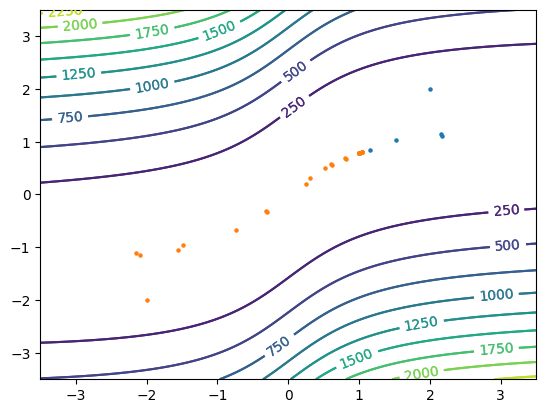

In [146]:
polakRibiere(f1, xb=[2, 2], maxiter=3000, eps=0.0001)
polakRibiere(f1, xb=[-2, -2], maxiter=3000, eps=0.0001)

#### Результат работы метода для второй функции

Начальная точка = [2, 2]
Решение найдено в точке = [1.00000255 0.78539943], значение функции = 101.00000000000325
Решение было найдено за количество итераций = 17

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99981349 0.78530288], значение функции = 101.00000001759621
Решение было найдено за количество итераций = 17



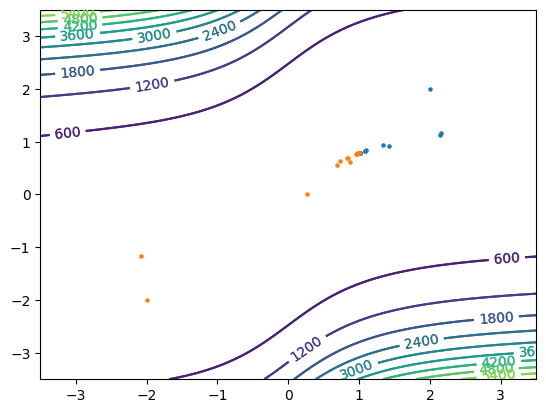

In [147]:
polakRibiere(f2, xb=[2, 2], maxiter=3000, eps=0.0001)
polakRibiere(f2, xb=[-2, -2], maxiter=3000, eps=0.0001)

### Метод Флетчера-Ривса

In [148]:
def fletcherReeves(func, xb, maxiter, eps):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb

    beta = 0
    g1, g2 = get_grad(func, xb[0], xb[1], 0.00001)
    gPrev = np.array([g1, g2])
    p = -gPrev

    for j in range(maxiter):
        x_lst.append(xk)

        alpha = goldenRatio(func, xk, p)

        xNext = xk + alpha * p

        g1, g2 = get_grad(func, xNext[0], xNext[1], 0.00001)
        gNext = np.array([g1, g2])

        if j % 5 == 0:
            beta = 0
        else:
            beta = (np.linalg.norm(gNext) ** 2) / (np.linalg.norm(gPrev) ** 2)

        pNext = - gNext + beta * p

        ng = np.linalg.norm(gNext - gPrev)

        if ng < eps:
            exitflag = 1
            iters = j + 1
            xk = xNext
            x_lst.append(xk)
            break

        xk, gPrev, p = xNext, gNext, pNext

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)

    msg = f"Начальная точка = {xb}\n"
    msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
    if exitflag == 1:
        msg += f"Решение было найдено за количество итераций = {iters}\n"
    else:
        msg += f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    print(msg)

#### Результат работы метода для первой функции

Начальная точка = [2, 2]
Решение найдено в точке = [1.00008079 0.78543584], значение функции = 7.2659847691955405e-09
Решение было найдено за количество итераций = 19

Начальная точка = [-2, -2]
Решение найдено в точке = [1.00010677 0.78545076], значение функции = 1.1462364503568933e-08
Решение было найдено за количество итераций = 22



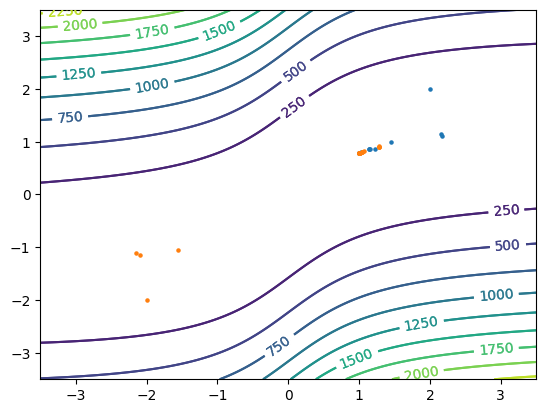

In [149]:
fletcherReeves(f1, xb=[2, 2], maxiter=3000, eps=0.0001)
fletcherReeves(f1, xb=[-2, -2], maxiter=3000, eps=0.0001)

#### Результат работы метода для второй функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99971652 0.78525352], значение функции = 101.00000004059575
Решение было найдено за количество итераций = 18

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99947431 0.78513136], значение функции = 101.00000013892951
Решение было найдено за количество итераций = 18



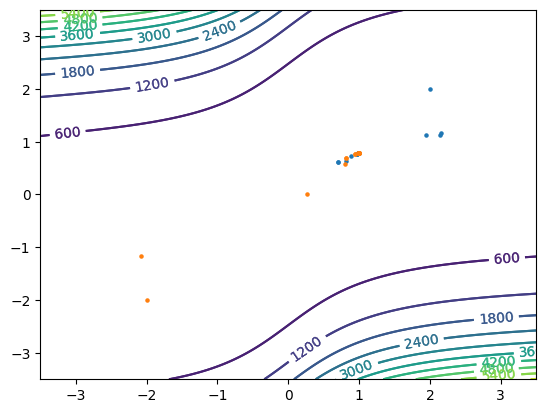

In [150]:
fletcherReeves(f2, xb=[2, 2], maxiter=3000, eps=0.0001)
fletcherReeves(f2, xb=[-2, -2], maxiter=3000, eps=0.0001)

##### *Вывод по методам сопряжённых градиентов:*

Оба метода нашли минимум функций с заданной точностью за гораздо меньшее количество итерации в сравнении с методом наискорейшего спуска, как и методы Ньютона. Это связано с тем, что методы Полака-Рибьера и Флетчера-Ривса используют информацию о предыдущих шагах оптимизации, что позволяет им быстрее находить оптимальное решение.

В целом, метод Полака-Рибьера может быть более эффективным, чем метод Флетчера-Ривса, для функции Розенброка, так как он использует более точную формулу для вычисления коэффициента бета. Но, как мы можем убедиться, нельзя выбрать метод однозначно, так как количество итераций зависит от выбора начальной точки.

## Квазиньютоновские методы

### Метод Давидона-Флетчера-Пауэлла (DFP)

In [151]:
def DFP(func, xb, maxiter, eps):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb

    g1, g2 = get_grad(func, xb[0], xb[1], 0.00001)
    gPrev = np.array([g1, g2])

    H = np.eye(2)
    p = - np.dot(H, gPrev)

    for j in range(maxiter):
        x_lst.append(xk)

        alpha = goldenRatio(func, xk, p)

        xNext = xk + alpha * p

        g1, g2 = get_grad(func, xNext[0], xNext[1], 0.00001)
        gNext = np.array([g1, g2])

        y = gNext - gPrev

        Hmuly = np.dot(H, y)
        Hmulyy = np.dot(Hmuly, y)
        Hmulyy_outer = np.outer(Hmuly, y)

        H = H - np.dot(Hmulyy_outer, H) / Hmulyy + alpha * (np.outer(p, p) / np.dot(p, y))

        p = - np.dot(H, gPrev)

        ng = np.linalg.norm(y)

        if ng < eps:
            exitflag = 1
            iters = j + 1
            xk = xNext
            x_lst.append(xk)
            break

        xk, gPrev = xNext, gNext

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)

    msg = f"Начальная точка = {xb}\n"
    msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
    if exitflag == 1:
        msg += f"Решение было найдено за количество итераций = {iters}\n"
    else:
        msg += f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    print(msg)

#### Результат работы метода для первой функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99973205 0.78527918], значение функции = 9.432203084615815e-08
Решение было найдено за количество итераций = 30

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99999363 0.78538946], значение функции = 3.0920601232155355e-09
Решение было найдено за количество итераций = 38



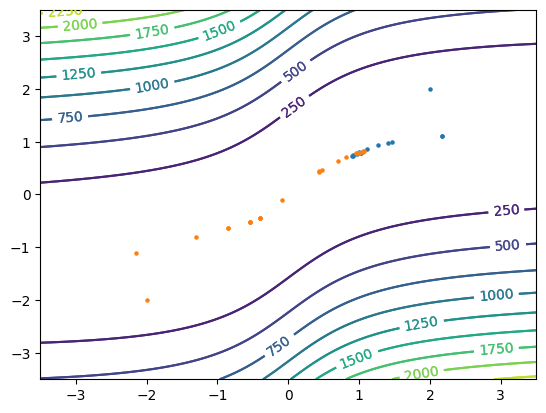

In [152]:
DFP(f1, xb=[2, 2], maxiter=3000, eps=0.00001)
DFP(f1, xb=[-2, -2], maxiter=3000, eps=0.00001)

#### Результат работы метода для второй функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99999848 0.78539845], значение функции = 101.00000000005558
Решение было найдено за количество итераций = 24

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99997487 0.7853733 ], значение функции = 101.00000000788329
Решение было найдено за количество итераций = 73



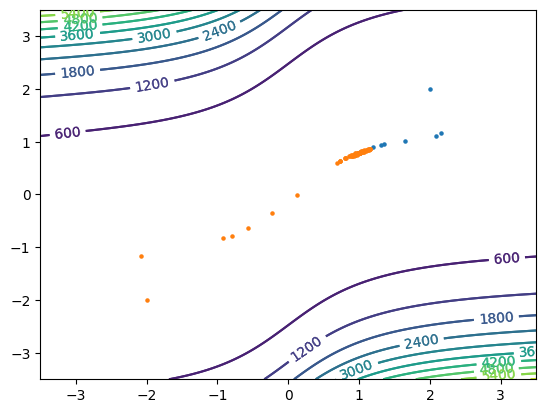

In [153]:
DFP(f2, xb=[2, 2], maxiter=3000, eps=0.00001)
DFP(f2, xb=[-2, -2], maxiter=3000, eps=0.00001)

### Метод Бройдена-Флетчера-Гольдфарба-Шенно (BFGS)

In [154]:
def BFGS(func, xb, maxiter, eps):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb

    g1, g2 = get_grad(func, xb[0], xb[1], 0.00001)
    gPrev = np.array([g1, g2])

    H = np.eye(2)
    p = - np.dot(H, gPrev)

    for j in range(maxiter):
        x_lst.append(xk)

        alpha = goldenRatio(func, xk, p)

        xNext = xk + alpha * p

        g1, g2 = get_grad(func, xNext[0], xNext[1], 0.00001)
        gNext = np.array([g1, g2])

        y = gNext - gPrev

        d = alpha * p

        Hmuld = H.dot(d)
        Hmuldd = np.dot(Hmuld, d)
        Hmuldd_outer = np.outer(Hmuld, d)

        HTranspose = H.T

        H = H - np.dot(Hmuldd_outer, HTranspose) / Hmuldd + (np.outer(y, y) / np.dot(y, d))

        Hinv = np.linalg.inv(H)
        p = - np.dot(Hinv, gPrev)

        ng = np.linalg.norm(y)

        if ng < eps:
            exitflag = 1
            iters = j + 1
            xk = xNext
            x_lst.append(xk)
            break

        xk, gPrev = xNext, gNext

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)

    msg = f"Начальная точка = {xb}\n"
    msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
    if exitflag == 1:
        msg += f"Решение было найдено за количество итераций = {iters}\n"
    else:
        msg += f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    print(msg)

#### Результат работы метода для первой функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99963562 0.78521052], значение функции = 1.3570499346499e-07
Решение было найдено за количество итераций = 23

Начальная точка = [-2, -2]
Решение найдено в точке = [0.99963484 0.78521154], значение функции = 1.34949865585067e-07
Решение было найдено за количество итераций = 36



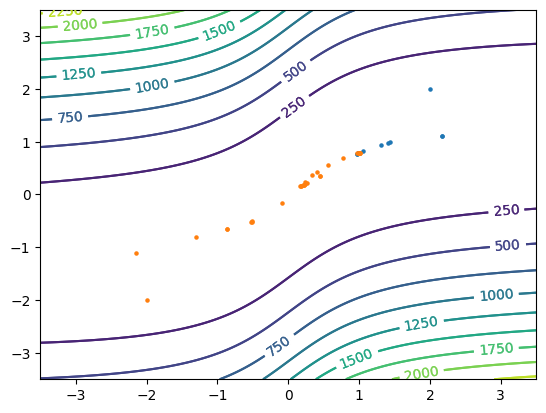

In [155]:
BFGS(f1, xb=[2, 2], maxiter=3000, eps=0.000001)
BFGS(f1, xb=[-2, -2], maxiter=3000, eps=0.000001)

#### Результат работы метода для второй функции

Начальная точка = [2, 2]
Решение найдено в точке = [0.99835322 0.78435339], значение функции = 101.00000379155524
Решение было найдено за количество итераций = 10

Начальная точка = [-2, -2]
Решение найдено в точке = [1.01287281 0.79178714], значение функции = 101.00008285771669
Решение было найдено за количество итераций = 11



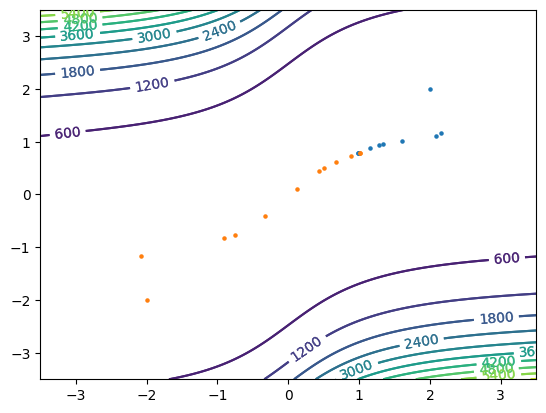

In [156]:
BFGS(f2, xb=[2, 2], maxiter=3000, eps=0.000001)
BFGS(f2, xb=[-2, -2], maxiter=3000, eps=0.000001)

##### *Вывод по квазиньютоновским методам:*

В целом, оба метода нашли глобальный минимум, но чтобы методы имели возможность сойтись к корректному решению, пришлось увеличивать требуемую точность *eps*.

Методы DFP и BFGS имеют ряд общих особенностей:

- Не требуют вычисления и хранения гессиана.
- Включают в себя матричные операции, что при больших итерациях приведёт к большой вычислительной погрешности.
- Требуют обеспечение положительной определенности матрицы H0.

Методы различны в своей сходимости:

- DFP обладает быстрой сходимостью, похожей на метод Ньютона-Рафсона.
- BFGS обладает быстрой сходимостью - компромиссом между методом наискорейшего спуска и методом Ньютона-Рафсона. Более надёжная сходимость в сравнении с DFP.